In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('student_addiction_dataset.csv')

In [3]:
df.head(5)

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,No,No,Yes,No,No,No,Yes,No,No,No
1,No,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
2,No,No,No,No,No,Yes,Yes,Yes,No,No,No
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes
4,Yes,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes


In [4]:
df.shape

(50342, 11)

In [5]:
df.isnull().sum()

Experimentation                       2562
Academic_Performance_Decline          2498
Social_Isolation                      2550
Financial_Issues                      2537
Physical_Mental_Health_Problems       2454
Legal_Consequences                    2576
Relationship_Strain                   2543
Risk_Taking_Behavior                  2577
Withdrawal_Symptoms                   2612
Denial_and_Resistance_to_Treatment    2453
Addiction_Class                          0
dtype: int64

In [6]:
df.tail()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
50337,Yes,Yes,No,NaN,Yes,Yes,Yes,NaN,No,No,No
50338,No,No,Yes,Yes,No,No,Yes,No,No,No,Yes
50339,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,No
50340,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No
50341,Yes,No,No,No,No,Yes,Yes,NaN,No,No,No


## Convert Categorical Data to Numerical Data

In [7]:
df.replace({"Yes" : 1, "No" : 0}, inplace=True)
df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,1.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1


## Handle missing value using KNNImputer

In [8]:
from sklearn.impute import KNNImputer

In [9]:
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [10]:
# Impute missing values
df = imputer.fit_transform(df)
df

array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0.6, ..., 1. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 1. , 1. , ..., 0. , 1. , 0. ],
       [0. , 1. , 1. , ..., 1. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [11]:
df = pd.DataFrame(df, columns=['Experimentation', 'Academic_Performance_Decline', 'Social_Isolation', 'Financial_Issues', 'Physical_Mental_Health_Problems', 'Legal_Consequences', 'Relationship_Strain', 'Risk_Taking_Behavior', 'Withdrawal_Symptoms', 'Denial_and_Resistance_to_Treatment', 'Addiction_Class'])
df

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.6,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,0.0,0.2,0.0,1.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
50337,1.0,1.0,0.0,0.2,1.0,1.0,1.0,0.8,0.0,0.0,0.0
50338,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
50339,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
50340,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
df.isnull().sum()

Experimentation                       0
Academic_Performance_Decline          0
Social_Isolation                      0
Financial_Issues                      0
Physical_Mental_Health_Problems       0
Legal_Consequences                    0
Relationship_Strain                   0
Risk_Taking_Behavior                  0
Withdrawal_Symptoms                   0
Denial_and_Resistance_to_Treatment    0
Addiction_Class                       0
dtype: int64

## Plot Figure

In [13]:
features = df[['Experimentation', 'Academic_Performance_Decline', 'Social_Isolation', 'Financial_Issues', 'Physical_Mental_Health_Problems', 'Legal_Consequences', 'Relationship_Strain', 'Risk_Taking_Behavior', 'Withdrawal_Symptoms', 'Denial_and_Resistance_to_Treatment']]
lables = df['Addiction_Class']

In [14]:
# Check dataset balance or not
lable_status = df['Addiction_Class'].value_counts()

# Draw pie chart
unique_data = lable_status.index
total_quantity = lable_status.values

figure = px.pie(df,
                values=total_quantity,
                names=unique_data, hole=0.60,
                title="Student Drug Addicted or Not")
figure.show()

<Axes: xlabel='Addiction_Class', ylabel='count'>

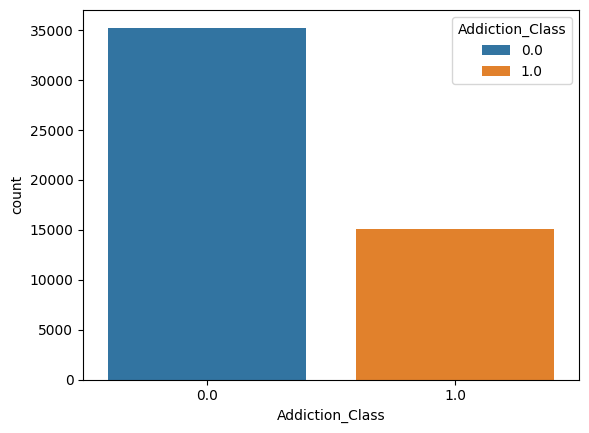

In [15]:
sns.countplot(x = 'Addiction_Class', data = df, hue='Addiction_Class') # 0=No, 1=Yes

<Axes: xlabel='Experimentation', ylabel='count'>

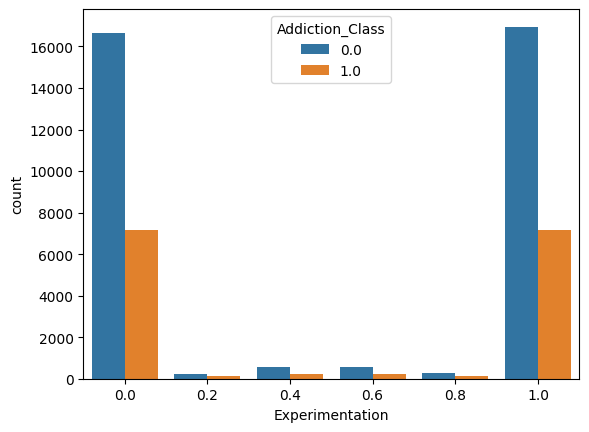

In [16]:
sns.countplot(x='Experimentation', data=df, hue='Addiction_Class')

<Axes: xlabel='Academic_Performance_Decline', ylabel='count'>

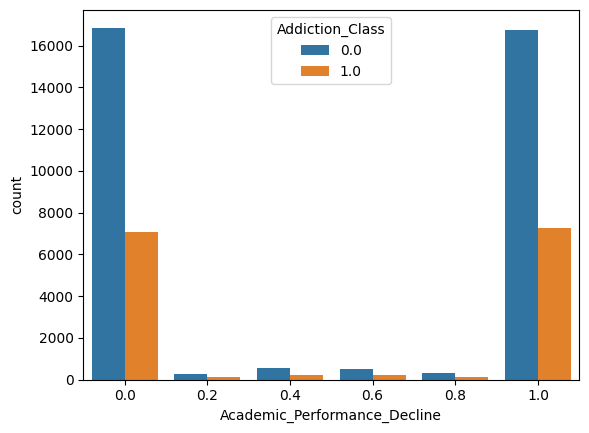

In [17]:
sns.countplot(x='Academic_Performance_Decline', data=df, hue='Addiction_Class')

<Axes: xlabel='Social_Isolation', ylabel='count'>

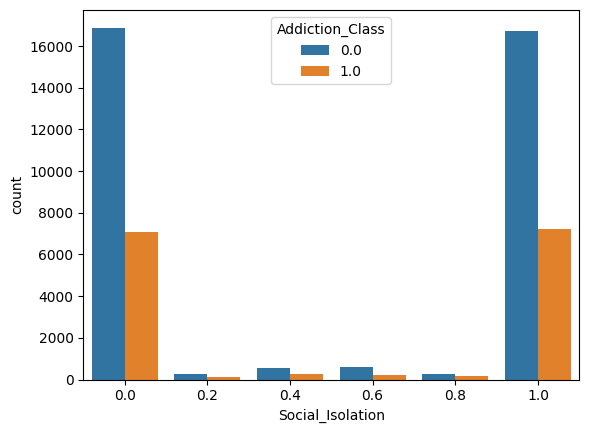

In [18]:
sns.countplot(x='Social_Isolation', data=df, hue='Addiction_Class')

<Axes: xlabel='Financial_Issues', ylabel='count'>

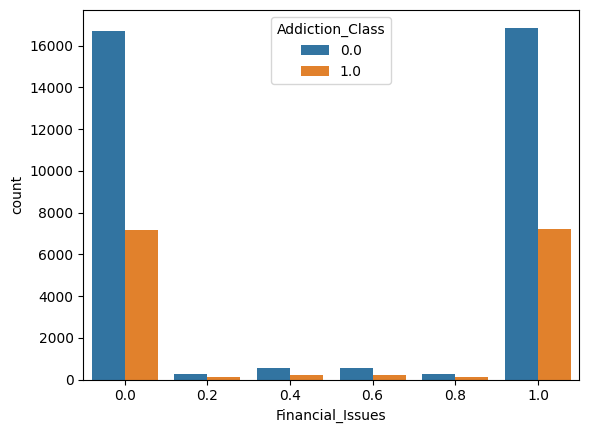

In [19]:
sns.countplot(x='Financial_Issues', data=df, hue='Addiction_Class')

In [20]:
df.describe()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
count,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000
mean,0.503532,0.501041,0.500334,0.501716,0.498872,0.498967,0.502408,0.498463,0.503568,0.502574,0.299392
std,0.489880,0.490041,0.489711,0.489856,0.490392,0.489668,0.489789,0.489687,0.489489,0.490247,0.457996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.600000,0.600000,0.600000,0.400000,0.400000,0.600000,0.400000,0.600000,0.600000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.corr()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
Experimentation,1.000000,0.000918,0.005301,-0.004522,0.002008,-0.006010,0.004399,-0.005819,0.000935,0.004991,-0.003403
Academic_Performance_Decline,0.000918,1.000000,0.001623,0.007684,-0.000536,0.001261,-0.002419,0.002500,0.000851,-0.004600,0.007002
Social_Isolation,0.005301,0.001623,1.000000,-0.006811,0.008086,-0.001773,-0.001009,0.011178,-0.009593,0.007051,0.007225
Financial_Issues,-0.004522,0.007684,-0.006811,1.000000,0.003711,-0.003201,-0.010179,0.001336,-0.005396,-0.003468,-0.000714
Physical_Mental_Health_Problems,0.002008,-0.000536,0.008086,0.003711,1.000000,0.001929,0.001442,-0.005808,-0.004702,-0.004719,0.007854
Legal_Consequences,-0.006010,0.001261,-0.001773,-0.003201,0.001929,1.000000,-0.000697,-0.000646,0.003070,-0.008547,0.002513
Relationship_Strain,0.004399,-0.002419,-0.001009,-0.010179,0.001442,-0.000697,1.000000,0.002894,-0.003348,0.001670,0.004845
Risk_Taking_Behavior,-0.005819,0.002500,0.011178,0.001336,-0.005808,-0.000646,0.002894,1.000000,0.002917,0.007930,-0.002217
Withdrawal_Symptoms,0.000935,0.000851,-0.009593,-0.005396,-0.004702,0.003070,-0.003348,0.002917,1.000000,0.006582,-0.002975
Denial_and_Resistance_to_Treatment,0.004991,-0.004600,0.007051,-0.003468,-0.004719,-0.008547,0.001670,0.007930,0.006582,1.000000,-0.009148


## Feature Selection

In [22]:
x = df.drop('Addiction_Class', axis=1)
x

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.2,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
50337,1.0,1.0,0.0,0.2,1.0,1.0,1.0,0.8,0.0,0.0
50338,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
50339,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
50340,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [23]:
y = df['Addiction_Class']
y

0        0.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
50337    0.0
50338    1.0
50339    0.0
50340    0.0
50341    0.0
Name: Addiction_Class, Length: 50342, dtype: float64

In [24]:
from sklearn.feature_selection import SelectKBest

In [25]:
from sklearn.feature_selection import chi2

In [26]:
FIT_FEATURES = SelectKBest(score_func=chi2)

In [27]:
FIT_FEATURES.fit(x,y)

SelectKBest(score_func=<function chi2 at 0x000001A83DF44DC0>)

In [28]:
SelectKBest(k=10)

SelectKBest()

In [29]:
SCORE_COL = pd.DataFrame(FIT_FEATURES.scores_, columns=['score value'])

In [30]:
NAME_COL = pd.DataFrame(x.columns)

In [32]:
topr_features = pd.concat([NAME_COL, SCORE_COL], axis=1)

In [33]:
topr_features.columns=['Top Features', 'Score']

In [34]:
topr_features

,Top Features,Score
0,Experimentation,0.277787
1,Academic_Performance_Decline,1.182944
2,Social_Isolation,1.259382
3,Financial_Issues,0.012285
4,Physical_Mental_Health_Problems,1.497079
5,Legal_Consequences,0.152740
6,Relationship_Strain,0.564274
7,Risk_Taking_Behavior,0.118998
8,Withdrawal_Symptoms,0.211944
9,Denial_and_Resistance_to_Treatment,2.014676


In [37]:
topr_features.nlargest(9, 'Score')

,Top Features,Score
9,Denial_and_Resistance_to_Treatment,2.014676
4,Physical_Mental_Health_Problems,1.497079
2,Social_Isolation,1.259382
1,Academic_Performance_Decline,1.182944
6,Relationship_Strain,0.564274
0,Experimentation,0.277787
8,Withdrawal_Symptoms,0.211944
5,Legal_Consequences,0.152740
7,Risk_Taking_Behavior,0.118998


In [38]:
df = df.drop(['Risk_Taking_Behavior', 'Legal_Consequences'], axis=1)
df

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Relationship_Strain,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.6,1.0,1.0,1.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,0.0,0.2,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
50337,1.0,1.0,0.0,0.2,1.0,1.0,0.0,0.0,0.0
50338,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
50339,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
50340,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## Split Train & Test Data

In [39]:
x = df.drop('Addiction_Class', axis=1)
x

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Relationship_Strain,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.6,1.0,1.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.2,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
50337,1.0,1.0,0.0,0.2,1.0,1.0,0.0,0.0
50338,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
50339,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
50340,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [40]:
y = df['Addiction_Class']
y

0        0.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
50337    0.0
50338    1.0
50339    0.0
50340    0.0
50341    0.0
Name: Addiction_Class, Length: 50342, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=30)

In [43]:
xtest

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Relationship_Strain,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment
2774,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
40497,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
10545,0.0,0.0,1.0,0.6,1.0,0.0,0.0,0.0
45272,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
17183,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
30042,0.0,1.0,0.0,0.0,0.4,1.0,0.0,1.0
5270,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45489,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
42745,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
ytest

2774     0.0
40497    0.0
10545    0.0
45272    1.0
17183    1.0
        ... 
30042    0.0
5270     1.0
45489    0.0
42745    0.0
6121     1.0
Name: Addiction_Class, Length: 10069, dtype: float64

## Apply ML Algorithm to Train, Test Data

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

In [47]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [48]:
model.predict(xtest)

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
model.score(xtest, ytest)

0.7025523885192174

In [51]:
pred_log = model.predict(xtest)
pred_log

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(ytest, pred_log)

0.7025523885192174

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(ytest, pred_log)

array([[7074,    0],
       [2995,    0]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(ytest, pred_log))

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.83      7074
         1.0       0.00      0.00      0.00      2995

    accuracy                           0.70     10069
   macro avg       0.35      0.50      0.41     10069
weighted avg       0.49      0.70      0.58     10069



c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Decision Tree

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=30)

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
clf = DecisionTreeClassifier()

In [62]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [63]:
clf.predict(xtest)

array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
clf.score(xtest, ytest)

0.701459926507101

In [66]:
pred_tree = clf.predict(xtest)

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(ytest, pred_tree)

array([[6702,  372],
       [2634,  361]], dtype=int64)

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(ytest, pred_tree))

              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82      7074
         1.0       0.49      0.12      0.19      2995

    accuracy                           0.70     10069
   macro avg       0.61      0.53      0.51     10069
weighted avg       0.65      0.70      0.63     10069



In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred_tree)

0.701459926507101

### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rclf = RandomForestClassifier()

In [75]:
rclf.fit(xtrain, ytrain)

RandomForestClassifier()

In [76]:
rclf.predict(xtest)

array([0., 0., 0., ..., 0., 0., 0.])

In [77]:
rclf.score(xtest, ytest)

0.7018571854205978

In [78]:
pred_ranf = rclf.predict(xtest)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred_ranf)

0.7018571854205978

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix(ytest, pred_ranf)

array([[6711,  363],
       [2639,  356]], dtype=int64)

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(ytest, pred_ranf))

              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82      7074
         1.0       0.50      0.12      0.19      2995

    accuracy                           0.70     10069
   macro avg       0.61      0.53      0.50     10069
weighted avg       0.65      0.70      0.63     10069



### SVM

In [85]:
from sklearn.svm import SVC

In [86]:
svm = SVC()

In [87]:
svm.fit(xtrain, ytrain)

SVC()

In [88]:
svm.predict(xtest)

array([0., 0., 0., ..., 0., 0., 0.])

In [89]:
svm.score(xtest, ytest)

0.7025523885192174

In [90]:
pred_svm = svm.predict(xtest)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred_ranf)

0.7018571854205978

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, pred_svm)

array([[7074,    0],
       [2995,    0]], dtype=int64)

In [93]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred_svm))

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.83      7074
         1.0       0.00      0.00      0.00      2995

    accuracy                           0.70     10069
   macro avg       0.35      0.50      0.41     10069
weighted avg       0.49      0.70      0.58     10069



c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Gaussain Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [95]:
gnb.fit(xtrain, ytrain)

GaussianNB()

In [96]:
gnb.predict(xtest)

array([0., 0., 0., ..., 0., 0., 0.])

In [97]:
gnb.score(xtest, ytest)

0.7025523885192174

In [98]:
pred_gnb =gnb.predict(xtest)

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred_gnb)

0.7025523885192174

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, pred_gnb)

array([[7074,    0],
       [2995,    0]], dtype=int64)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred_gnb))

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.83      7074
         1.0       0.00      0.00      0.00      2995

    accuracy                           0.70     10069
   macro avg       0.35      0.50      0.41     10069
weighted avg       0.49      0.70      0.58     10069



c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Bernouli Naive Bayes

In [103]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [104]:
bnb.fit(xtrain, ytrain)

BernoulliNB()

In [105]:
bnb.predict(xtest)

array([0., 0., 0., ..., 0., 0., 0.])

In [106]:
bnb.score(xtest, ytest)

0.7025523885192174

In [107]:
pred_bnb = bnb.predict(xtest)

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred_bnb)

0.7025523885192174

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, pred_bnb)

array([[7074,    0],
       [2995,    0]], dtype=int64)

In [110]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred_bnb))

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.83      7074
         1.0       0.00      0.00      0.00      2995

    accuracy                           0.70     10069
   macro avg       0.35      0.50      0.41     10069
weighted avg       0.49      0.70      0.58     10069



c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Multinomial Naive Bayes

In [111]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [112]:
mnb.fit(xtrain, ytrain)

MultinomialNB()

In [113]:
mnb.predict(xtest)

array([0., 0., 0., ..., 0., 0., 0.])

In [114]:
mnb.score(xtest, ytest)

0.7025523885192174

In [115]:
pred_mbn = mnb.predict(xtest)

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred_mbn)

0.7025523885192174

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, pred_mbn)

array([[7074,    0],
       [2995,    0]], dtype=int64)

In [118]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred_mbn))

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.83      7074
         1.0       0.00      0.00      0.00      2995

    accuracy                           0.70     10069
   macro avg       0.35      0.50      0.41     10069
weighted avg       0.49      0.70      0.58     10069



c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

